In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
train_df = pd.read_excel(r"/Users/prathameshbodhankar/Downloads/Data_Train.xlsx")
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
test_df = pd.read_excel(r"/Users/prathameshbodhankar/Downloads/Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
final_df = train_df._append(test_df)

#Feature enginerring for data of journey

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


Convert the object final_df['date of journey] into datetime format

In [8]:
final_df['date'] = final_df['Date_of_Journey'].str.split('/').str[0].astype(int)
final_df['month'] = final_df['Date_of_Journey'].str.split('/').str[1].astype(int)
final_df['year'] = final_df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [9]:
final_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [10]:
final_df = final_df.drop('Date_of_Journey', axis = 1)

In [11]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]
# .astype(int)


In [12]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].str.split(':').str[0].astype(int)
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1].astype(int)
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [13]:
final_df.drop('Arrival_Time',axis = 1, inplace = True)

In [14]:
# final_df['Dep_Time'] = final_df['Dep_Time'].str.split(' ').str[0].astype(int)
final_df['Dep_hour'] = final_df['Dep_Time'].str.split(':').str[0].astype(int)
final_df['Dep_min'] = final_df['Dep_Time'].str.split(':').str[1].astype(int)
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [15]:
final_df.drop('Dep_Time', axis = 1, inplace = True)

In [16]:
final_df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [17]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
date                  0
month                 0
year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
dtype: int64

In [18]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop' : 0, '2 stops':2, '1 stop':1, '3 stops':3, 'nan':1, '4 stops':4})

In [19]:
final_df.drop('Route', axis = 1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0


In [20]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [21]:
final_df.drop(final_df[final_df['Duration'] == '5m'].index, inplace = True)

In [22]:
final_df['duration_hr'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)

In [23]:
final_df['duration_hr'] = final_df['duration_hr'] * 60

In [24]:
final_df['duration_min'] = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [25]:
final_df['duration_min'] = final_df['duration_min'].fillna('0')
final_df['duration_min'] = final_df['duration_min'].astype(int)

In [26]:
final_df = final_df.drop('Duration', axis = 1)


In [27]:
final_df['final_duration'] = final_df['duration_hr'] * 60 + final_df['duration_min']

In [28]:
final_df = final_df.drop(['duration_hr', 'duration_min'], axis = 1)

In [29]:
final_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,final_duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,1,10,22,20,7250


In [30]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [33]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [34]:
final_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,final_duration
0,3,0,5,BLR → DEL,0.0,8,3897.0,24,3,2019,1,10,22,20,7250


In [35]:
final_df = final_df.drop('Route', axis = 1)

In [36]:
final_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,final_duration
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,7250


In [37]:
print(final_df.shape)

(13351, 14)


In [38]:
final_df['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [39]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(np.array(final_df['Airline']).reshape(-1, 1))



In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int64  
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int64  
 5   Price            10681 non-null  float64
 6   date             13351 non-null  int64  
 7   month            13351 non-null  int64  
 8   year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  final_duration   13351 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.5 MB


In [41]:
pd.get_dummies(final_df,columns=["Airline", "Source", "Destination"] ,drop_first = True, dtype = int)

,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,0.0,8,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2.0,8,7662.0,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2.0,8,13882.0,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1.0,8,6218.0,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,8,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,8,NaN,6,6,2019,20,25,20,30,...,0,0,0,1,0,0,0,0,0,0
2667,0.0,8,NaN,27,3,2019,16,55,14,20,...,0,0,0,1,0,0,0,0,0,0
2668,1.0,8,NaN,6,3,2019,4,25,21,50,...,0,0,1,0,0,1,0,0,0,0
2669,1.0,8,NaN,6,3,2019,19,15,4,0,...,0,0,1,0,0,1,0,0,0,0


In [42]:
final_df.fillna(final_df['Price'].mode().iloc[0], inplace = True)

In [43]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int64  
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Total_Stops      13351 non-null  float64
 4   Additional_Info  13351 non-null  int64  
 5   Price            13351 non-null  float64
 6   date             13351 non-null  int64  
 7   month            13351 non-null  int64  
 8   year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  final_duration   13351 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.5 MB


In [44]:
final_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'date', 'month', 'year', 'Arrival_hour', 'Arrival_min',
       'Dep_hour', 'Dep_min', 'final_duration'],
      dtype='object')

In [45]:
X = final_df.loc[:,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'date', 'month', 'year', 'Arrival_hour', 'Arrival_min','Dep_hour', 'Dep_min', 'final_duration']]
X

,Airline,Source,Destination,Total_Stops,Additional_Info,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,final_duration
0,3,0,5,0.0,8,24,3,2019,1,10,22,20,7250
1,1,3,0,2.0,8,1,5,2019,13,15,5,50,25225
2,4,2,1,2.0,8,9,6,2019,4,25,9,25,68400
3,3,3,0,1.0,8,12,5,2019,23,30,18,5,18025
4,3,0,5,1.0,8,1,3,2019,21,35,16,50,14445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,6,6,2019,20,25,20,30,82855
2667,3,3,0,0.0,8,27,3,2019,16,55,14,20,7235
2668,4,2,1,1.0,8,6,3,2019,4,25,21,50,21635
2669,1,2,1,1.0,8,6,3,2019,19,15,4,0,54015


In [46]:
y = final_df['Price']
y.fillna('0').astype(int)

0        3897
1        7662
2       13882
3        6218
4       13302
        ...  
2666    10262
2667    10262
2668    10262
2669    10262
2670    10262
Name: Price, Length: 13351, dtype: int64

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:

print(selection.feature_importances_)

[0.13216991 0.02490151 0.04805018 0.10381937 0.05535551 0.17972551
 0.06306592 0.         0.04092782 0.03826072 0.03909889 0.0404807
 0.23414395]


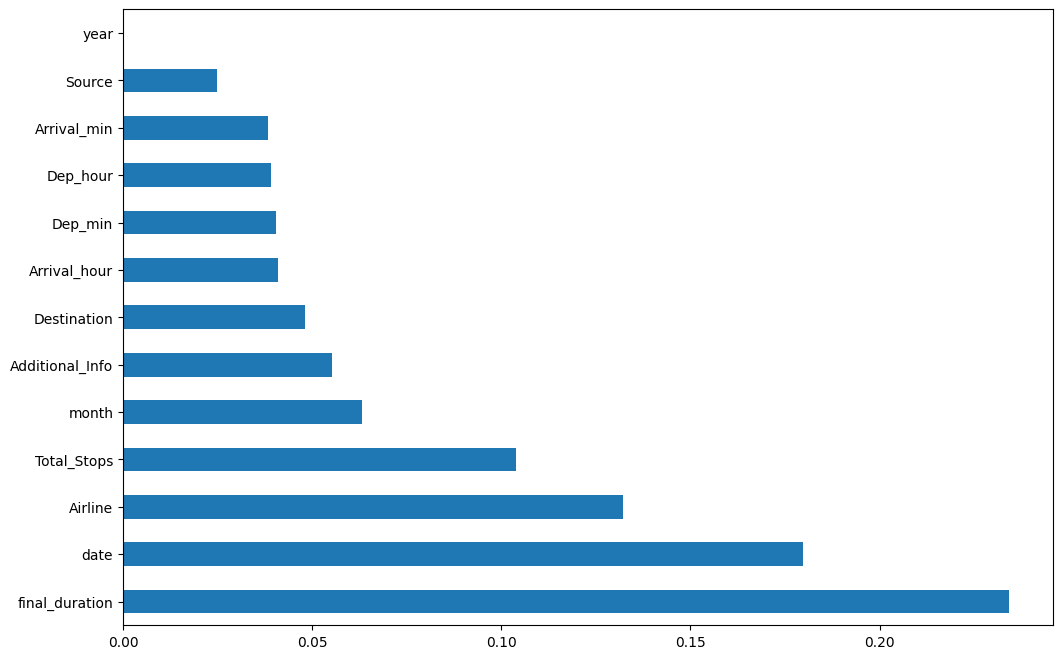

In [49]:
plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [50]:
x = final_df
y = y

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(x)

data1[0]

array([-0.41352538, -1.65795747,  2.41948935, -0.01795328,  0.49429712,
       -1.30678448,  1.25712151, -1.46785175,  0.        , -1.7973807 ,
       -0.8853789 ,  1.65380729, -0.23910898, -0.97128893])

In [52]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9345, 14), (4006, 14), (9345,), (4006,))

Extra trees regressor model

In [53]:

selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor()

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [55]:
y_pred = selection.predict(x_test)

In [56]:
metrics(y_test, y_pred)

RMSE: 38.82249914952252
R_Squared_Value: 0.999905777130449


In [58]:
accuracy(y_test, y_pred)

np.float64(99.97212750686627)

Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [61]:
y_pred = model.predict(x_test)

In [62]:
metrics(y_test, y_pred)

RMSE: 5.465226204524122e-12
R_Squared_Value: 1.0


In [63]:
accuracy(y_test, y_pred)

np.float64(99.99999999999994)

/var/folders/fr/b_9srzv570zgrg708slyg6rw0000gn/T/ipykernel_12150/1665189797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


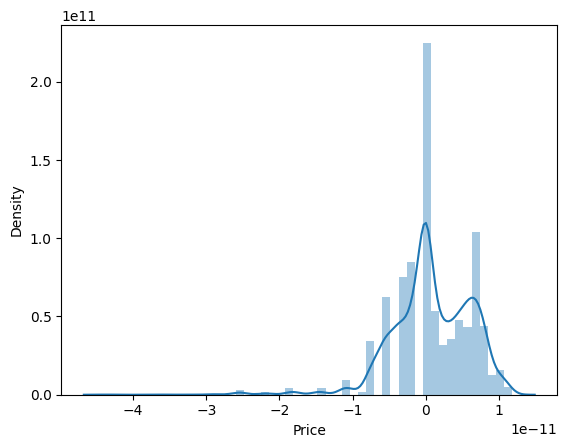

In [64]:

sns.distplot(y_test-y_pred)
plt.show()